In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split # деление на train и test
from sklearn.tree import DecisionTreeClassifier # Дерево решений
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle # сохранение модели

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data = data[['Survived', 'Pclass', 'Age', 'Fare']]
data = data.dropna(subset = ['Age'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [6]:
data.Fare.describe()

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64

In [8]:
data.drop('Survived', axis = 1)

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
885,3,39.0,29.1250
886,2,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [14]:
# Разделение данных на обучающую и тестовую выборку
train, test = train_test_split(data, test_size=0.2)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    cm - матрица ошибок
    classes - список классов
    normalize - если True, то значения матрицы ошибок нормализуются к 1
    title - заголовок графика
    cmap - цветовая схема для отображения графика
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalize confuzion matrix')
    else:
        print('Confusion matrix, without normalization')

    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')



accuracy 0.6363636363636364
Confusion matrix, without normalization
              precision    recall  f1-score   support

Not survived       0.62      0.85      0.72        78
    Survived       0.68      0.38      0.49        65

    accuracy                           0.64       143
   macro avg       0.65      0.62      0.60       143
weighted avg       0.65      0.64      0.61       143



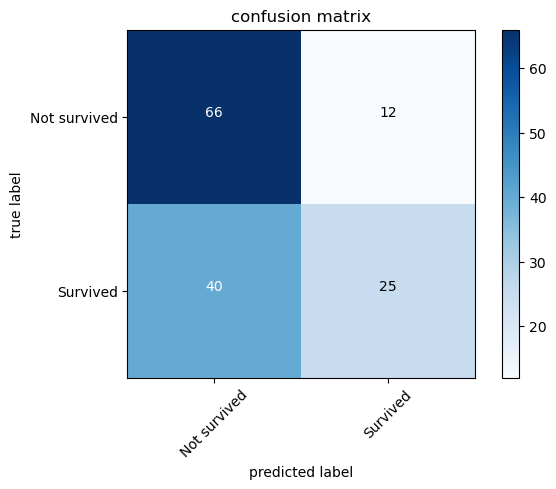

In [21]:
def experiment(max_depth, min_sample_split):
    # Создание и обучение модели
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split= min_sample_split)
    model.fit(train.drop('Survived', axis = 1), train['Survived'])

    # Вычисление метрик
    preds = model.predict(test.drop('Survived', axis= 1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)

    print('accuracy', acc)

    # Визуализация матрицы ошибок
    plot_confusion_matrix(cm, classes = ['Not survived', 'Survived'])

    report = classification_report(test['Survived'], preds, target_names= ['Not survived', 'Survived'])
    print(report)

    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)




max_depth = 5 # глубина дерева
min_sample_split = 150 # 

experiment(max_depth, min_sample_split)